### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

The independant variable is the type of word (congruent or incongruent). The dependant variable is the time it takes to say the name of the color of the word.

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

The null hypothesis is that the time taken to say the color is independent of the type of word, i.e. there is no effect on the time given any type of word. Hence the difference in their times is <=0. The alternative hypothesis is that the time to taken to read incongruent words is greater. 

        H0 : dt<=0
        H1 : dt>0 
        
where dt is the time differene between the two types. 
I am doing a one-sided hypothesis test. The null choice is typically when there is no effect and alternative is when there is some effect. I will look at the t-test as the population standard deviation is not known and the sample size is very small, and I can reject the null hypothesis based on the t and p-value.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
df = pd.read_csv("stroopdata.csv")
df.info()
print(df['Congruent'].mean(),df['Incongruent'].mean())
print(df['Congruent'].std(),df['Incongruent'].std())
diffs = df['Incongruent'] - df['Congruent']
print(diffs.mean(),diffs.std())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes
14.051125000000004 22.01591666666667
3.559357957645195 4.797057122469138
7.964791666666667 4.864826910359056


The mean value of the times taken for the Congruent and Incongruent data sets are 14.0 with a standard deviation of 3.6 s and 22.0 with a standard deviation of 4.8 s resepectively. The difference in means is 8.0+-4.9 s. 

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

In [47]:
hi = max(df[df.columns[0]].max(),df[df.columns[1]].max())
low = min(df[df.columns[0]].min(),df[df.columns[1]].min())
print(low,hi)

8.63 35.255


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


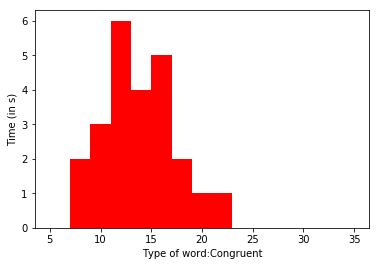

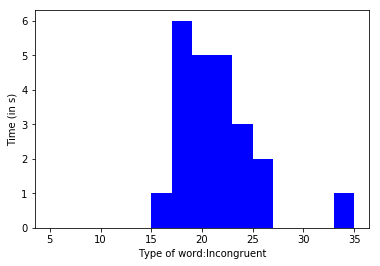

(array([ 4.,  3.,  5.,  5.,  5.,  0.,  1.,  0.,  1.,  0.]),
 array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,
         22.5,  25. ]),
 <a list of 10 Patch objects>)

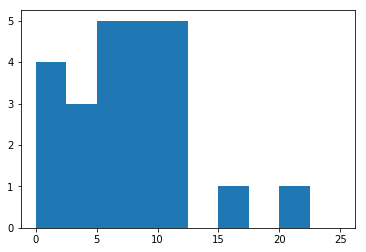

In [48]:
df.info()
names = df.columns
col = ['red','blue']
i=0
for n in names:
    plt.hist(df[n],bins=15,range=(5.0,35.0),color=col[i])
    plt.xlabel('Type of word:'+n)
    plt.ylabel('Time (in s)')
    i=i+1
    plt.show()
    
diff = df[names[1]]-df[names[0]]
plt.hist(diff,bins=10,range=(0.0,25.0))

The time taken on an average to read the congruent words is smaller than the time taken to read incongruent words. The mean for the top histogram is 14s while for the second histogram its about 22s.  Their difference is 8.0+-5.0 s. But our question is could we obtain this value under a null distribution, i.e. there is no difference in time. How probable is this value to come from a null distribution? So, we perform a statistical test below to test this hypothesis, and based on this we can reject or accept the null hypothesis.

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [50]:
from scipy import stats

N=np.count_nonzero(diffs)
tval = np.mean(diffs)/(np.std(diffs)/(N)**0.5)
print('Observed t-value :',tval)

#Get the critical t-value and p-value
cl=0.95
alph=1-cl
ndeg=N-1
print('Critical t Value : ',stats.t.isf(alph, ndeg))

pval = stats.t.sf(tval, N-1)
print('p-value        :',pval)

if pval < alph :
    print ('We reject the null hypothesis')

Observed t-value : 8.193215000970776
Critical t Value :  1.71387152775
p-value        : 1.42058986238e-08
We reject the null hypothesis


Since the observed t-value is much larger than the critical value of 1.714, and also the pvalue is very small, much smaller than our significance level of 5%, we can reject the null hypothesis at the 95% C.L and conclude that there exists a mean time difference between reading congruent and Incongruent words. The results did match up to my expectations because it would be more difficult to read incongruent words and this is what I see